## Descriptive Statistics

Assignment 6.2

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('data/reddit_posts.csv')

In [4]:
# tokenization/normalization 
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [5]:
# apply preprocessing to 'selftext'
df['tokens'] = df['selftext'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else [])

In [6]:
# descriptive statistics
numerical_stats = df.describe()
token_count_stats = df['tokens'].describe()

In [7]:
# most common words
all_tokens = [token for tokens in df['tokens'] for token in tokens]
fdist = FreqDist(all_tokens)
most_common_words = fdist.most_common(10)

In [8]:
# output statistics
print("Numerical Statistics:\n", numerical_stats)
print("\nToken Count Statistics:\n", token_count_stats)
print("\nMost Common Words:\n", most_common_words)

Numerical Statistics:
        num_comments      upvotes    downvotes  upvotes/subscribers
count   3969.000000  3969.000000  3969.000000          3969.000000
mean      16.956664    30.929885     1.467804             0.000094
std       39.490405    73.258161     4.742290             0.000165
min        0.000000     0.000000     0.000000             0.000000
25%        0.000000     1.000000     0.000000             0.000014
50%        1.000000     2.000000     0.000000             0.000043
75%       13.000000    29.591837     0.813953             0.000110
max      520.000000   948.979592    60.923077             0.003436

Token Count Statistics:
 count     3971
unique    3780
top         []
freq        11
Name: tokens, dtype: object

Most Common Words:
 [('like', 6375), ('feel', 5773), ('know', 3935), ('time', 3270), ('get', 3241), ('want', 3168), ('life', 2973), ('even', 2815), ('thing', 2789), ('year', 2564)]


In [9]:
# reviwing as seperate df 
mental_health_support_df = pd.read_csv('data/mental_health_support_posts.csv')
mental_health_df = pd.read_csv('data/mental_health_posts.csv')

In [10]:
stop_words = set(stopwords.words('english'))
# removing additional stop words
additional_stopwords = {'like', 'feel', 'know', 'get', 'time', 'want', 'life', 'even', 'thing', 'year'}
stop_words = stop_words.union(additional_stopwords)
lemmatizer = WordNetLemmatizer()

def analyze_subreddit(subreddit_df):
    # Apply preprocessing to the 'selftext' column
    subreddit_df['tokens'] = subreddit_df['selftext'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else [])

    # Descriptive statistics
    numerical_stats = subreddit_df.describe()
    token_count_stats = subreddit_df['tokens'].apply(len).describe()

    # Most common words
    all_tokens = [token for tokens in subreddit_df['tokens'] for token in tokens]
    fdist = FreqDist(all_tokens)
    most_common_words = fdist.most_common(10)

    return numerical_stats, token_count_stats, most_common_words

In [11]:

# Analyze 'r/MentalHealthSupport' subreddit
mental_health_support_numerical_stats, mental_health_support_token_count_stats, mental_health_support_common_words = analyze_subreddit(mental_health_support_df)

print("Descriptive Statistics for r/MentalHealthSupport:")
print("Numerical Statistics:\n", mental_health_support_numerical_stats)
print("\nToken Count Statistics:\n", mental_health_support_token_count_stats)
print("\nMost Common Words:\n", mental_health_support_common_words)

# Analyze 'r/MentalHealth' subreddit
mental_health_numerical_stats, mental_health_token_count_stats, mental_health_common_words = analyze_subreddit(mental_health_df)

print("\nDescriptive Statistics for r/MentalHealth:")
print("Numerical Statistics:\n", mental_health_numerical_stats)
print("\nToken Count Statistics:\n", mental_health_token_count_stats)
print("\nMost Common Words:\n", mental_health_common_words)

Descriptive Statistics for r/MentalHealthSupport:
Numerical Statistics:
        num_comments      upvotes    downvotes  upvotes/subscribers
count   1926.000000  1926.000000  1926.000000          1926.000000
mean       2.141745     2.972800     0.131159             0.000064
std        5.406600     4.882752     0.361374             0.000106
min        0.000000     0.000000     0.000000             0.000000
25%        0.000000     1.000000     0.000000             0.000022
50%        0.000000     2.000000     0.000000             0.000043
75%        2.000000     3.000000     0.000000             0.000065
max      154.000000   158.585859     3.739130             0.003436

Token Count Statistics:
 count    1928.000000
mean      104.106846
std       109.367133
min         0.000000
25%        38.000000
50%        71.000000
75%       131.000000
max      1123.000000
Name: tokens, dtype: float64

Most Common Words:
 [('really', 1473), ('would', 1347), ('friend', 1335), ('people', 1327), ('day', 

In [12]:
!pip install TextBlob

In [13]:
# reviwing as seperate df 
mental_health_support_df = pd.read_csv('data/mental_health_support_posts.csv')
mental_health_df = pd.read_csv('data/mental_health_posts.csv')

In [14]:
stop_words = set(stopwords.words('english'))
additional_stopwords = {'like', 'feel', 'know', 'get', 'time', 'want', 'life', 'even', 'thing', 'year'}
stop_words = stop_words.union(additional_stopwords)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def analyze_subreddit(subreddit_df):
    subreddit_df['tokens'] = subreddit_df['selftext'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else [])
    numerical_stats = subreddit_df.describe()
    token_count_stats = subreddit_df['tokens'].apply(len).describe()
    all_tokens = [token for tokens in subreddit_df['tokens'] for token in tokens]
    fdist = FreqDist(all_tokens)
    most_common_words = fdist.most_common(10)
    return numerical_stats, token_count_stats, most_common_words

def analyze_sentiments(subreddit_df):
    def get_sentiment_category(polarity):
        if polarity > 0:
            return 'positive'
        elif polarity < 0:
            return 'negative'
        else:
            return 'neutral'

    subreddit_df['sentiment'] = subreddit_df['selftext'].apply(lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else 0)
    subreddit_df['sentiment_category'] = subreddit_df['sentiment'].apply(get_sentiment_category)
    sentiment_stats = subreddit_df['sentiment'].describe()
    sentiment_category_counts = subreddit_df['sentiment_category'].value_counts()
    return sentiment_stats, sentiment_category_counts

def generate_word_cloud(tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

def topic_modeling(tokens_list, num_topics=5):
    dictionary = corpora.Dictionary(tokens_list)
    corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    topics = lda_model.print_topics(num_words=10)
    return topics

def plot_time_series(subreddit_df, title):
    subreddit_df.set_index('created_utc', inplace=True)
    monthly_counts = subreddit_df.resample('M').size()
    monthly_counts.plot(figsize=(10, 5), title=title)
    plt.ylabel('Number of Posts')
    plt.show()

In [15]:
#'r/MentalHealthSupport' subreddit
mental_health_support_numerical_stats, mental_health_support_token_count_stats, mental_health_support_common_words = analyze_subreddit(mental_health_support_df)
mental_health_support_sentiment_stats, mental_health_support_sentiment_category_counts = analyze_sentiments(mental_health_support_df)
mental_health_support_topics = topic_modeling(mental_health_support_df['tokens'].tolist())

print("Descriptive Statistics for r/MentalHealthSupport:")
print("Numerical Statistics:\n", mental_health_support_numerical_stats)
print("\nToken Count Statistics:\n", mental_health_support_token_count_stats)
print("\nMost Common Words:\n", mental_health_support_common_words)
print("\nSentiment Statistics:\n", mental_health_support_sentiment_stats)
print("\nSentiment Category Counts:\n", mental_health_support_sentiment_category_counts)
print("\nTopics for r/MentalHealthSupport:")

Descriptive Statistics for r/MentalHealthSupport:
Numerical Statistics:
        num_comments      upvotes    downvotes  upvotes/subscribers
count   1926.000000  1926.000000  1926.000000          1926.000000
mean       2.141745     2.972800     0.131159             0.000064
std        5.406600     4.882752     0.361374             0.000106
min        0.000000     0.000000     0.000000             0.000000
25%        0.000000     1.000000     0.000000             0.000022
50%        0.000000     2.000000     0.000000             0.000043
75%        2.000000     3.000000     0.000000             0.000065
max      154.000000   158.585859     3.739130             0.003436

Token Count Statistics:
 count    1928.000000
mean      104.106846
std       109.367133
min         0.000000
25%        38.000000
50%        71.000000
75%       131.000000
max      1123.000000
Name: tokens, dtype: float64

Most Common Words:
 [('really', 1473), ('would', 1347), ('friend', 1335), ('people', 1327), ('day', 

(0, '0.006*"im" + 0.006*"people" + 0.006*"never" + 0.006*"always" + 0.005*"one" + 0.005*"friend" + 0.005*"said" + 0.005*"mom" + 0.005*"anything" + 0.004*"think"')
(1, '0.008*"really" + 0.007*"day" + 0.007*"work" + 0.007*"help" + 0.006*"one" + 0.006*"thing" + 0.006*"go" + 0.006*"friend" + 0.005*"going" + 0.005*"mental"')
(2, '0.013*"people" + 0.006*"friend" + 0.006*"make" + 0.006*"never" + 0.006*"would" + 0.005*"thing" + 0.005*"year" + 0.005*"feeling" + 0.004*"parent" + 0.004*"really"')
(3, '0.009*"would" + 0.005*"got" + 0.005*"day" + 0.005*"back" + 0.005*"year" + 0.005*"friend" + 0.004*"thing" + 0.004*"mental" + 0.004*"one" + 0.004*"really"')
(4, '0.009*"really" + 0.008*"would" + 0.008*"people" + 0.008*"friend" + 0.008*"think" + 0.007*"make" + 0.006*"thing" + 0.006*"help" + 0.006*"something" + 0.006*"go"')


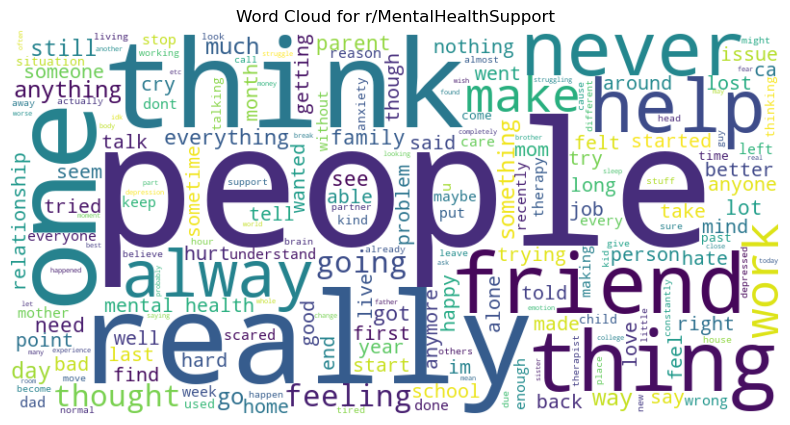

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [16]:
for topic in mental_health_support_topics:
    print(topic)

generate_word_cloud([token for tokens in mental_health_support_df['tokens'] for token in tokens], 'Word Cloud for r/MentalHealthSupport')
plot_time_series(mental_health_support_df, 'Monthly Post Counts for r/MentalHealthSupport')

In [ ]:
#'r/MentalHealth' subreddit
mental_health_numerical_stats, mental_health_token_count_stats, mental_health_common_words = analyze_subreddit(mental_health_df)
mental_health_sentiment_stats, mental_health_sentiment_category_counts = analyze_sentiments(mental_health_df)
mental_health_topics = topic_modeling(mental_health_df['tokens'].tolist())

print("\nDescriptive Statistics for r/MentalHealth:")
print("Numerical Statistics:\n", mental_health_numerical_stats)
print("\nToken Count Statistics:\n", mental_health_token_count_stats)
print("\nMost Common Words:\n", mental_health_common_words)
print("\nSentiment Statistics:\n", mental_health_sentiment_stats)
print("\nSentiment Category Counts:\n", mental_health_sentiment_category_counts)
print("\nTopics for r/MentalHealth:")

In [ ]:
for topic in mental_health_topics:
    print(topic)

generate_word_cloud([token for tokens in mental_health_df['tokens'] for token in tokens], 'Word Cloud for r/MentalHealth')
plot_time_series(mental_health_df, 'Monthly Post Counts for r/MentalHealth')